# Import Libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.0.0'

In [4]:
keras.__version__

'2.2.4-tf'

# Load Dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [10]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
class_names[y_train[0]]

'Coat'

# Creating Model Using the Sequential API

In [14]:
#model = keras.models.Sequential()

In [15]:
#model.add(keras.layers.Flatten(input_shape=[28, 28]))
#model.add(keras.layers.Dense(300, activation='relu'))
#model.add(keras.layers.Dense(100, activation='relu'))
#model.add(keras.layers.Dense(10, activation='softmax'))

We can also pass a list of layers when creating Sequential model instead of adding the layers one by one.

In [16]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]),
                                 keras.layers.Dense(300, activation='relu'),
                                 keras.layers.Dense(100, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax') 
                                ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[ 0.0334998 ,  0.04466081, -0.04827698, ...,  0.03043342,
        -0.0686726 , -0.05431043],
       [-0.06725508, -0.02962869,  0.0606055 , ..., -0.00547396,
        -0.03326756,  0.02137227],
       [ 0.0118914 , -0.02388677, -0.01404019, ..., -0.04605309,
        -0.01305417, -0.06365535],
       ...,
       [ 0.04180734,  0.00105146,  0.01917896, ..., -0.01846509,
        -0.03934882, -0.04662476],
       [-0.05028331,  0.01194914, -0.02660424, ..., -0.0247781 ,
         0.05513489, -0.02715772],
       [ 0.03543782, -0.00667211, -0.02697752, ...,  0.05312048,
        -0.01844412, -0.06108465]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

# Compiling the model

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training And Evaluating the model

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 13s 240us/sample - loss: 0.7242 - accuracy: 0.7651 - val_loss: 0.5090 - val_accuracy: 0.8294
Epoch 2/30
55000/55000 [==============================] - 11s 197us/sample - loss: 0.4903 - accuracy: 0.8296 - val_loss: 0.4378 - val_accuracy: 0.8514
Epoch 3/30
55000/55000 [==============================] - 11s 193us/sample - loss: 0.4445 - accuracy: 0.8439 - val_loss: 0.4235 - val_accuracy: 0.8530
Epoch 4/30
55000/55000 [==============================] - 11s 195us/sample - loss: 0.4179 - accuracy: 0.8525 - val_loss: 0.3951 - val_accuracy: 0.8652
Epoch 5/30
55000/55000 [==============================] - 11s 199us/sample - loss: 0.3986 - accuracy: 0.8617 - val_loss: 0.3809 - val_accuracy: 0.8670
Epoch 6/30
55000/55000 [==============================] - 12s 213us/sample - loss: 0.3820 - accuracy: 0.8662 - val_loss: 0.3897 - val_accuracy: 0.8644
Epoch 7/30
55000/55000 [=====================

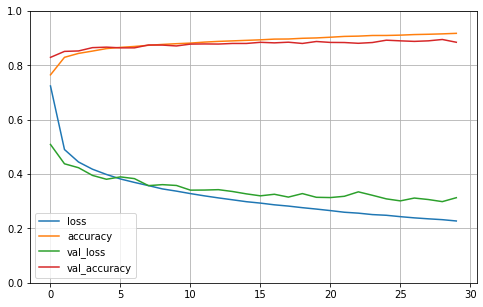

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[81.06766419677734, 0.8254]

# Using the model to make predictions

In [38]:
X_new = X_test[:3]

In [39]:
y_proba = model.predict(X_new)

In [40]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
y_pred = model.predict_classes(X_new)

In [42]:
y_pred

array([9, 2, 1])

In [44]:
import numpy as np

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]

In [47]:
y_new

array([9, 2, 1], dtype=uint8)

In [49]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')